In [1]:
import netCDF4  as nc
import numpy as np
import matplotlib.pyplot as plt

In [150]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

In [192]:
def read_nvi(nvi_file: str) :
    """Read a nvi file and return time, latitude, longitude and altitude"""
    with nc.Dataset(nvi_file) as dataset:
        #time = dataset.variables["mbDate"]
        #time_frac = dataset.variables["mbTime"]
        #time.set_auto_scale(False)  # disable autoscale to be able to set a starting date, force to 1970
        #time_values = time[:]
        #time_frac_values = time_frac[:]
        # time_values = nc.num2date(time[1:100], calendar="julian", units="days since 1970-01-01 00:00:00",)
        #npd = time_values.astype("timedelta64[D]")
        #npd2 = time_frac_values.astype("timedelta64[ms]")
        
        return {
        #"times" : np.datetime64("1970-01-01 00:00:00") + npd + npd2,
        "latitudes" : dataset.variables["mbOrdinate"][:],
        "longitudes" : dataset.variables["mbAbscissa"][:],
        "altitudes" : dataset.variables["mbAltitude"][:],
        "headings" : dataset.variables["mbHeading"][:],
        "speeds" : dataset.variables["mbSpeed"][:],
        #flags = dataset.variables["mbPFlag"][:]
        }

In [108]:
def plot_value_and_gradient(x_value, y_value, y_gradient, y_label="value"):
    # plot values & gradient
    fig,ax = plt.subplots()
    ax.plot(x_value,y_value,color="blue")
    ax.set_ylabel(y_label,color="blue",fontsize=8)
    ax2=ax.twinx()
    ax2.plot(x_value,y_gradient, '.',color="green")
    ax2.set_ylabel("gradient",color="green",fontsize=8)
    plt.show()

In [245]:
def plot_cut_nav(lon, lat, mask, title ="Cut navigation"):
    lon_cut = np.ma.masked_array(lon,mask)
    lat_cut = np.ma.masked_array(lat,mask)
    fig,ax = plt.subplots()
    ax.plot(lon,lat,color="red")
    ax.set_ylabel("nav_invalid",color="red",fontsize=8)
    ax2=ax.twinx()
    ax2.plot(lon_cut,lat_cut,'-',color="green")
    ax2.set_ylabel("nav_valid",color="green",fontsize=8)
    plt.title(title,fontsize=8)
    plt.show()

In [224]:
def cut_nvi_file(navigation, start = 0, end = -1, interval =10, heading_gradient_threshold = 2, speed_gradient_threshold = 0.08 ) :
    #time= navigation["times"][start:end:interval] 
    heading = navigation["headings"][start:end:interval]
    speed = navigation["speeds"][start:end:interval]
    lat = navigation["latitudes"][start:end:interval]
    lon = navigation["longitudes"][start:end:interval]

    # cut navigation from heading gradient
    heading_mask = None
    if heading_gradient_threshold is not None:
        heading_gradient = np.abs(np.gradient(heading))
        # get corrected gradient (apply shift on gradient over 90° (values before and after 360°))
        heading_gradient = (np.abs(np.ma.masked_less(heading_gradient, 90)-180)).filled(heading_gradient)
        heading_mask = np.ma.masked_greater(heading_gradient,heading_gradient_threshold).mask
        #plot_value_and_gradient(time, heading, heading_gradient, "heading")
        #plot_cut_nav(lon,lat, heading_mask)

    # cut navigation from speed gradient
    speed_mask = None
    if speed_gradient_threshold is not None:
        speed_gradient = np.abs(np.gradient(speed))
        speed_mask = np.ma.masked_greater(speed_gradient,speed_gradient_threshold).mask
        #plot_value_and_gradient(time, speed, speed_gradient, "speed")
        #plot_cut_nav(lon,lat, speed_mask)

    # mixed result
    title = f'intreval = {interval} ; heading_threshold = {heading_gradient_threshold} ; speed_threshold = {speed_gradient_threshold}'
    if (speed_mask is not None) & (heading_mask is not None):
        plot_cut_nav(lon,lat, speed_mask | heading_mask, title)
    elif heading_mask is not None:
        plot_cut_nav(lon,lat, heading_mask, title)
    elif speed_mask is not None:
        plot_cut_nav(lon,lat, speed_mask, title)

In [255]:
base_path="C://Users//gbillant//Desktop//test_gravi//Salsa-leg1-14000800//tests//"
filename="output_merge_with_speed.nvi"
file_path= base_path + filename
navigation = read_nvi(file_path)

C:\dev\miniconda\envs\pyat_dev\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app
C:\dev\miniconda\envs\pyat_dev\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()
C:\dev\miniconda\envs\pyat_dev\lib\site-pac

In [ ]:
base_path="C://Users//gbillant//Desktop//test_gravi//Salsa-leg1-14000800//tests//"
filename="201400080055.nvi"
file_path= base_path + filename,'.',
navigation = read_nvi(file_path)

In [ ]:
base_path="C://Users//gbillant//Desktop//GLOBE//formation//chereef//"
filename="PL_11_nav_orig.nvi"
file_path= base_path + filename
navigation = read_nvi(file_path)

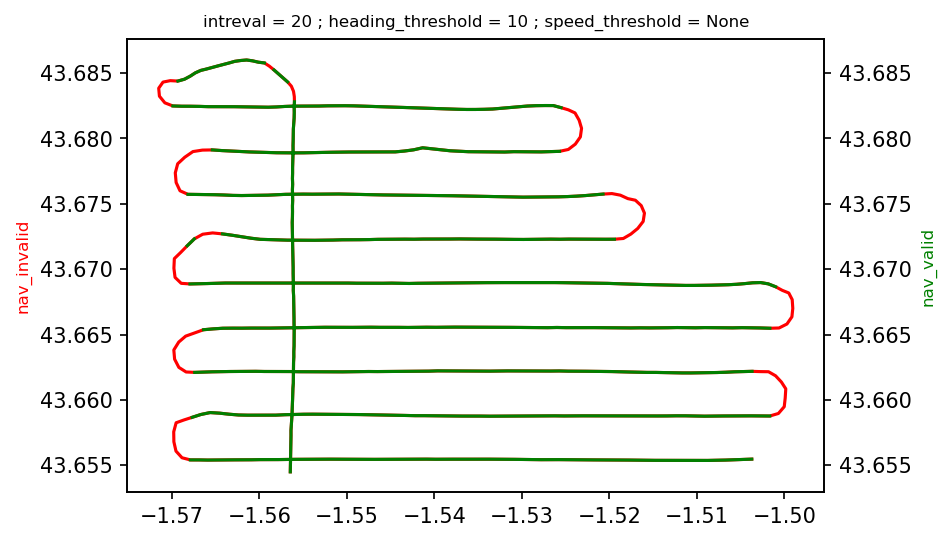

In [257]:
cut_nvi_file(navigation,interval =20, heading_gradient_threshold = 10, speed_gradient_threshold = None)

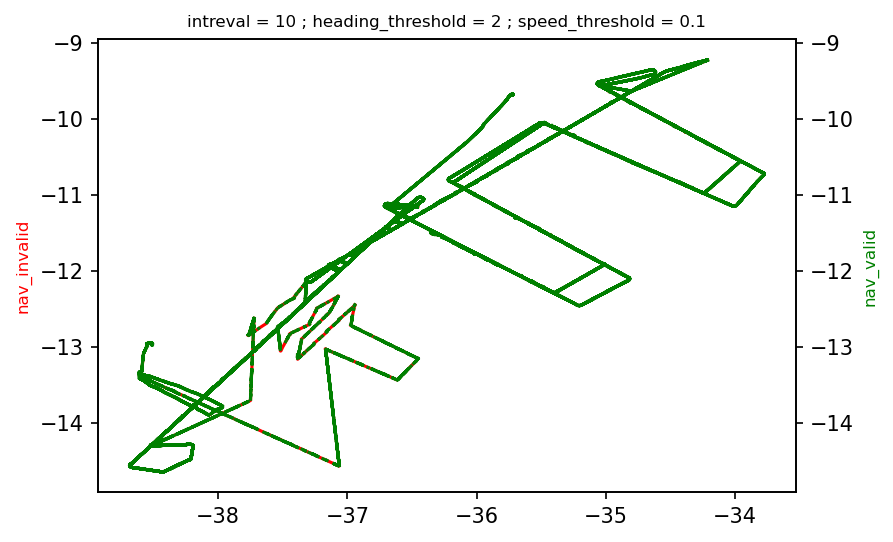

In [228]:
cut_nvi_file(navigation,interval =10, heading_gradient_threshold = 2, speed_gradient_threshold = 0.1)